In [34]:
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
import math

1. Смоделировать выборку из 15 независимых наблюдений над случайной величиной X,
имеющей нормальный закон распределения с параметрами (-2,10).

In [35]:
norm_r=sts.norm.rvs(loc=-2,scale=math.sqrt(10), size=15)
print(norm_r)

[-2.93934631 -2.61219488  2.60414872 -1.53072345 -3.33812038 -1.04629583
 -4.05211441 -0.97473104 -2.08839088 -4.34165659 -6.32426002 -4.68818874
  0.21595083 -4.14779016 -2.08856724]


1.1. С надежностью 0.95 найти интервальную оценку (доверительный интервал) для
математического ожидания случайной величины X, предполагая, что дисперсия
случайной величины X известна.
*интервальные оценки найти двумя способами.
Первый способ заключается в программной реализации формул для вычисления границ
интервальной оценки, а второй — в использовании метода interval из модуля
статистических функций scipy.stats.

$$P=(Xср- \Delta \le a \le Xср-\Delta)=0.95$$
$$
\Delta=\frac{t_\gamma\sigma}{\sqrt{n}}$$
$$
\Phi(t_\gamma)=\frac{\gamma}{2} $$

In [36]:
x_mean=np.mean(norm_r)
t_y=1.96 
del_=(1.96*np.sqrt(10))/math.sqrt(15)
low_bound=x_mean-del_
up_bound=x_mean+del_
print(f"Доверительный интервал для a способ 1): [{low_bound};{up_bound}]")

interval = sts.norm.interval(0.95, loc=np.mean(norm_r), scale=np.sqrt(10) / np.sqrt(15))
print(f"Доверительный интервал (способ 2): [{interval[0]:.2f}, {interval[1]:.2f}]")

Доверительный интервал для a способ 1): [-4.090485323841167;-0.8898187266044815]
Доверительный интервал (способ 2): [-4.09, -0.89]


1.2. С надежностью  найти интервальную оценку (доверительный интервал) для
математического ожидания случайной величины X, предполагая, что дисперсия
случайной величины X неизвестна
$$P=(Xср- \Delta \le a \le Xср-\Delta)=0.95$$
$$
\Delta=\frac{t_\gamma*S}{\sqrt{n}}$$
$$
\Phi(t_\gamma)=\frac{\gamma}{2} $$

In [37]:
x_mean = np.mean(norm_r)

# 2. Вычисляем выборочную дисперсию S^2
S_2 = 0
for i in norm_r:
    S_2 += math.pow(i - x_mean, 2)
S_2 /= 14  


S = math.sqrt(S_2)

t_value = sts.t.ppf(1 - 0.05 / 2, df=15-1)  # квантиль для доверительного уровня 95%
print(t_value)

delta = t_value * S / np.sqrt(15)
lower_bound = x_mean - delta
upper_bound = x_mean + delta
print(f"Доверительный интервал для a при неизвестной дисперсии: [{lower_bound:.2f}; {upper_bound:.2f}]")

# 6. Способ с использованием scipy.stats.t.interval
interval = sts.t.interval(0.95, df=15-1, loc=x_mean, scale=S / np.sqrt(15))
print(f"Доверительный интервал (способ 2): [{interval[0]:.2f}, {interval[1]:.2f}]")

2.1447866879169273
Доверительный интервал для a при неизвестной дисперсии: [-3.71; -1.27]
Доверительный интервал (способ 2): [-3.71, -1.27]


1.3. С надежностью 0.95 найти интервальную оценку (доверительный интервал) для
дисперсии случайной величины X.
$$
\left( \frac{(n - 1) S^2}{\chi^2_{\frac{\alpha}{2}, n-1}}, \frac{(n - 1) S^2}{\chi^2_{1 - \frac{\alpha}{2}, n-1}} \right)
$$

In [38]:
alpha = 0.05
chi2_lower = sts.chi2.ppf(alpha / 2, df=14)
chi2_upper = sts.chi2.ppf(1 - alpha / 2, df=14)

# 3. Вычисляем границы доверительного интервала для дисперсии
lower_bound = 14 * S_2 / chi2_upper
upper_bound = 14 * S_2 / chi2_lower

print(f"Доверительный интервал для дисперсии при надежности 0.95: ({lower_bound:.2f}; {upper_bound:.2f})")

Доверительный интервал для дисперсии при надежности 0.95: (2.60; 12.08)


2. Построить график зависимости длины доверительного интервала от надежности при
неизменном объеме выборки для случаев интервального оценивания математического
ожидания и дисперсии.

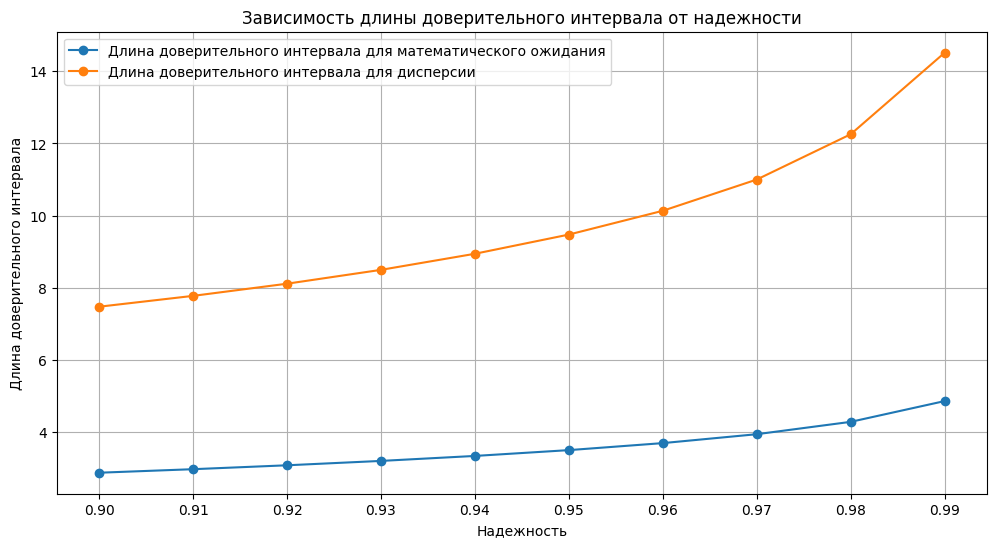

In [39]:
confidence_levels = np.linspace(0.90, 0.99, 10)  # от 90% до 99%

# Длины доверительных интервалов
len_mean = []
len_var = []

for confidence in confidence_levels:
    # 1. Доверительный интервал для математического ожидания
    alpha = 1 - confidence
    t_value = sts.t.ppf(1 - alpha / 2, 14) 
    len_interval = t_value * (np.sqrt(10) / np.sqrt(15)) 
    length_mean = 2 * len_interval 
    len_mean.append( length_mean)

    # 2. Доверительный интервал для дисперсии
    chi2_lower = sts.chi2.ppf(alpha / 2, 14)
    chi2_upper = sts.chi2.ppf(1 - alpha / 2, 14)
    length_variance = (14) * S_2 / chi2_lower - (14) * S_2 / chi2_upper
    len_var.append(length_variance)

# Построение графиков
plt.figure(figsize=(12, 6))
plt.plot(confidence_levels, len_mean, marker='o', label='Длина доверительного интервала для математического ожидания')
plt.plot(confidence_levels, len_var, marker='o', label='Длина доверительного интервала для дисперсии')
plt.title('Зависимость длины доверительного интервала от надежности')
plt.xlabel('Надежность')
plt.ylabel('Длина доверительного интервала')
plt.grid()
plt.legend()
plt.xticks(confidence_levels)
plt.show()

3. Построить график зависимости длины доверительного интервала от объема выборки при
неизменной надежности для случаев интервального оценивания математического
ожидания и дисперсии.
Пусть объем выборки изменяется от 10 до 40 с шагом 5

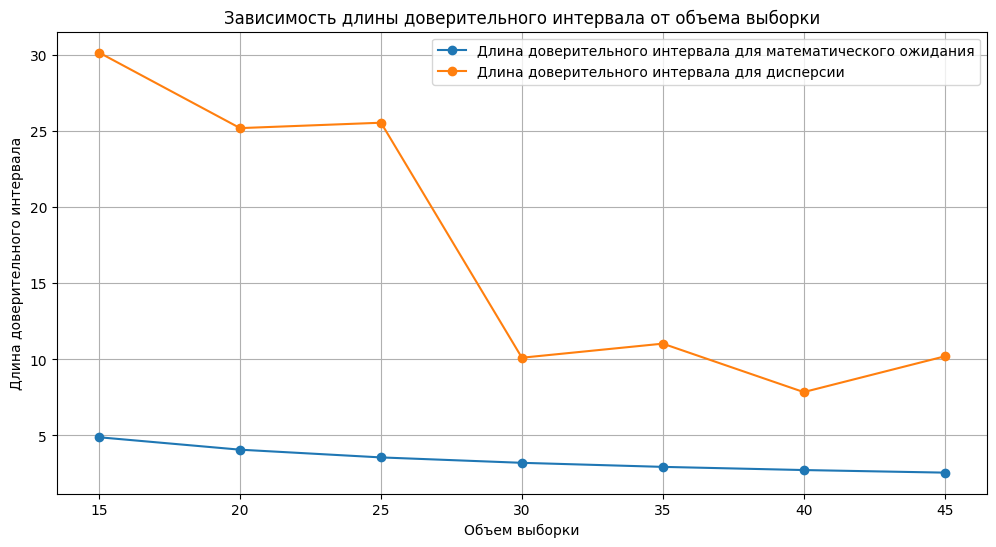

In [40]:
sample_size = list(range(15, 50, 5))
confidence=0.99
# Длины доверительных интервалов
len_mean = []
len_var = []

for size in sample_size:
    norm_r=sts.norm.rvs(loc=-2,scale=math.sqrt(10), size=size)

    x_mean = np.mean(norm_r)

# 2. Вычисляем выборочную дисперсию S^2
    S_2 = 0
    for i in norm_r:
        S_2 += math.pow(i - x_mean, 2)
    S_2 /= size-1
    # 1. Доверительный интервал для математического ожидания
    alpha = 1 - confidence
    t_value = sts.t.ppf(1 - alpha / 2, size-1) 
    len_interval = t_value * (np.sqrt(10) / np.sqrt(size)) 
    length_mean = 2 * len_interval 
    len_mean.append( length_mean)

    # 2. Доверительный интервал для дисперсии
    chi2_lower = sts.chi2.ppf(alpha / 2,  size-1)
    chi2_upper = sts.chi2.ppf(1 - alpha / 2,  size-1)
    length_variance = ( size-1) * S_2 / chi2_lower - ( size-1) * S_2 / chi2_upper
    len_var.append(length_variance)

# Построение графиков
plt.figure(figsize=(12, 6))
plt.plot(sample_size, len_mean, marker='o', label='Длина доверительного интервала для математического ожидания')
plt.plot(sample_size, len_var, marker='o', label='Длина доверительного интервала для дисперсии')
plt.title('Зависимость длины доверительного интервала от объема выборки')
plt.xlabel('Объем выборки')
plt.ylabel('Длина доверительного интервала')
plt.grid()
plt.legend()
plt.xticks(sample_size)
plt.show()

4. Смоделировать 1900 выборок из 15 значений нормально распределенной случайной
величины X с параметрами (-2,10). По каждой из 1900 выборок с надежностью 0,95 найти
интервальную оценку (доверительный интервал) для математического ожидания случайной
величины X, предполагая, что дисперсия случайной величины X неизвестна.

По результатам моделирования найти точечную оценку $\gamma$* надежности $\gamma$.

In [41]:
M=1900
count_gamma=0 # счетчик для гамма, попавших в интервал
for i in range(M):
    sample = sts.norm.rvs(loc=-2, scale=math.sqrt(10), size=15)
    sample_mean = np.mean(sample)
    sample_s_2 = 0
    for i in sample:
        sample_s_2 += math.pow(i - sample_mean, 2)
    sample_s_2 /= 14 
    t_value = sts.t.ppf(1 - alpha / 2, 14)
    margin = t_value * np.sqrt(sample_s_2 / 15)
    
    # Доверительный интервал
    ci_lower = sample_mean - margin
    ci_upper = sample_mean +margin
    
    # Проверяем, содержит ли интервал истинное значение математического ожидания
    if (ci_lower <= -2) and (-2 <= ci_upper):
        count_gamma += 1

# Точечная оценка надежности γ*
gamma = count_gamma / M
print(f"Точечная оценка надежности γ*: {gamma}")
    

Точечная оценка надежности γ*: 0.9868421052631579


5. Смоделировать M выборок из n значений нормально распределенной случайной
величины X с параметрами (-2,10).

In [42]:
M = 1900 
n = 15 

samples = np.zeros((M, n))

for i in range(M):
    sample = sts.norm.rvs(loc=-2, scale=np.sqrt(10), size=n)
    samples[i] = sample 


5.1. По каждой из M выборок найти наблюдаемое значение случайной величины Z
(описание случайной величины Z приведено в Вашем варианте)

$Z = \frac{\bar{X} - a}{S} \cdot \sqrt{n}$

In [43]:
z_arr=list()
for i in samples:
    x_m=np.mean(i)
    s_2 = 0
    for i in sample:
        s_2 += math.pow(i - x_m, 2)
    s_2 /= 14 
    s=np.sqrt(s_2)
    z=np.sqrt(15)*(x_m+2)/s
    z_arr.append(z)


5.2. По выборке из M значений случайной величины Z найти выборочные числовые
характеристики ее распределения.

In [44]:
z_mean=np.mean(z_arr)
z_var=np.var(z_arr)
z_median = np.median(z_arr)
std= np.std(z_arr) 
skewness = sts.skew(z_arr)        # Коэффициент ассиметрии
kurtosis = sts.kurtosis(z_arr)

# Вывод результатов
print(f'Математическое ожидание: {z_mean:.5f}')
print(f'Медиана: {z_median:.5f}')
print(f'Дисперсия: {z_var:.3f}')
print(f'Стандартное отклонение: {std:.5f}')
print(f'Коэффициент ассиметрии: {skewness:.5f}')
print(f'Эксцесс: {kurtosis:.5f}')

Математическое ожидание: 0.00706
Медиана: -0.03700
Дисперсия: 1.507
Стандартное отклонение: 1.22780
Коэффициент ассиметрии: 0.08903
Эксцесс: -0.72440


5.3. Построить гистограмму относительных частот и теоретическую кривую распределения
случайной величины Z, а также ящичковую диаграмму.

In [45]:
std_z = np.std(z_arr)

# Формула Скотта: ширина бина
h_z = 3.5 * std_z / (1900 ** (1/3))

#полученные интервалы
bins = (np.arange(min(z_arr), max(z_arr) + h_z, h_z))/1900
print(bins)

[-1.47355264e-03 -1.29094311e-03 -1.10833357e-03 -9.25724034e-04
 -7.43114498e-04 -5.60504962e-04 -3.77895426e-04 -1.95285890e-04
 -1.26763538e-05  1.69933182e-04  3.52542718e-04  5.35152254e-04
  7.17761790e-04  9.00371326e-04  1.08298086e-03  1.26559040e-03
  1.44819993e-03  1.63080947e-03  1.81341901e-03]


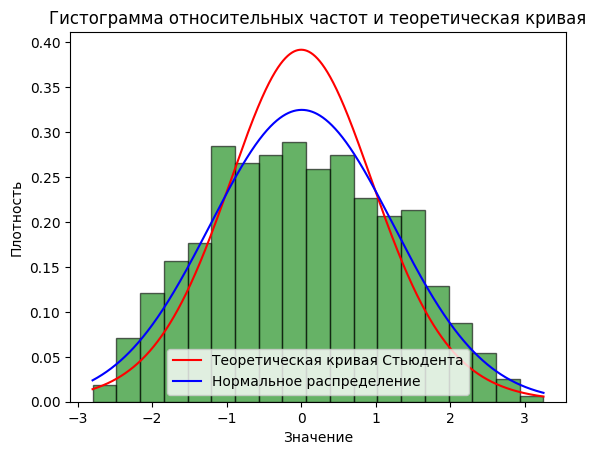

In [46]:
plt.hist(z_arr, bins=len(bins), density=True, alpha=0.6, color='g', edgecolor='black')
plt.title('Гистограмма относительных частот')
plt.xlabel('Значение')
plt.ylabel('Плотность')

# Теоретическая кривая распределения Стьюдента
x = np.linspace(np.min(z_arr), np.max(z_arr), 1900)
pdf = sts.t.pdf(x, 14)
plt.plot(x, pdf, 'r', label="Теоретическая кривая Стьюдента")

y = np.linspace(np.min(z_arr), np.max(z_arr), 1900)
pdf = sts.norm.pdf(y, np.mean(z_arr), np.std(z_arr))
plt.plot(y, pdf, 'b', label="Нормальное распределение")

plt.title('Гистограмма относительных частот и теоретическая кривая')
plt.xlabel('Значение')
plt.ylabel('Плотность')
plt.legend()

# Показать график
plt.show()

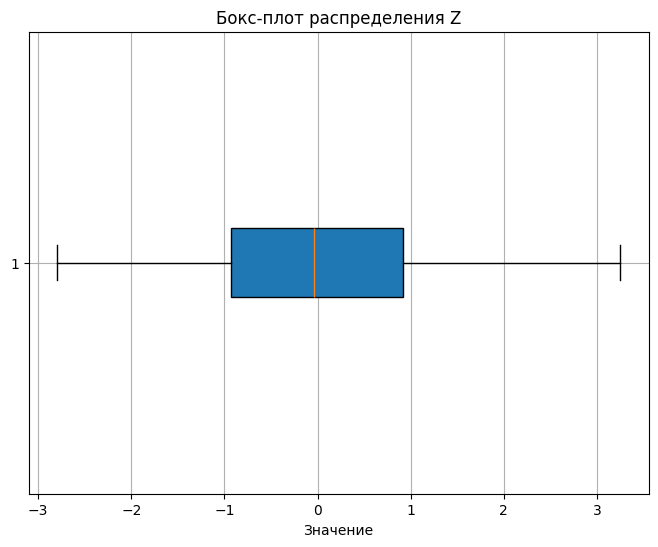

Фактическое количество выбросов: 0


In [47]:
plt.figure(figsize=(8, 6))
plt.boxplot(z_arr, vert=False, patch_artist=True)
plt.title('Бокс-плот распределения Z')
plt.xlabel('Значение')
plt.grid(True)
plt.show()

q1 = np.percentile(z_arr, 25)
q3 = np.percentile(z_arr, 75)
iqr = q3 - q1

# Вычисляем границы для усов
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = []
for i in z_arr:
    if i < lower_bound or i > upper_bound:
        outliers.append(i)
num_outliers = len(outliers)
print(f"Фактическое количество выбросов: {num_outliers}")

Часть II.
1. Смоделировать 1900 выборок из 15 значений нормально распределенной случайной
величины X с параметрами (-2, 10). По каждой из M выборок с надежностью 0,95 найти
интервальную оценку (доверительный интервал) для дисперсии случайной величины X.

In [48]:
M = 1900
count_gamma = 0  

for i in range(M):
    sample = sts.norm.rvs(loc=-2, scale=math.sqrt(10), size=15)
    sample_mean = np.mean(sample)
    
    s_2 = 0
    for x in sample:
        s_2 += math.pow(x - sample_mean, 2)
    s_2 /= 14 

    alpha = 0.05
    chi2_lower = sts.chi2.ppf(alpha / 2, df=14)
    chi2_upper = sts.chi2.ppf(1 - alpha / 2, df=14)

    # Вычисляем границы доверительного интервала для дисперсии
    lower_bound = 14 * s_2 / chi2_upper
    upper_bound = 14 * s_2 / chi2_lower
    
    if (lower_bound <= 10) and (10 <= upper_bound):
        count_gamma += 1

# Точечная оценка надежности γ*
gamma = count_gamma / M
print(f"Точечная оценка надежности γ*: {gamma}")


Точечная оценка надежности γ*: 0.9463157894736842


2. Повторив пункт 1. 150 раз, получите массив из 150 значений оценки $\gamma*$. Найдите выборочные

числовые характеристики оценки $\gamma*$, постройте гистограмму относительных частот и бокс-
плот.

In [49]:
M = 1900
  
k=150
gamma_arr=list()
for g in range(k):
    count_gamma = 0
    for i in range(M):
        sample = sts.norm.rvs(loc=-2, scale=math.sqrt(10), size=15)
        sample_mean = np.mean(sample)
        
        s_2 = 0
        for x in sample:
            s_2 += math.pow(x - sample_mean, 2)
        s_2 /= 14 

        alpha = 0.05
        chi2_lower = sts.chi2.ppf(alpha / 2, df=14)
        chi2_upper = sts.chi2.ppf(1 - alpha / 2, df=14)

        # Вычисляем границы доверительного интервала для дисперсии
        lower_bound = 14 * s_2 / chi2_upper
        upper_bound = 14 * s_2 / chi2_lower
        
        if (lower_bound <= 10) and (10 <= upper_bound):
            count_gamma += 1

    # Точечная оценка надежности γ*
    gamma = count_gamma / M
    gamma_arr.append(gamma)



In [50]:
gamma_mean=np.mean(gamma_arr)
gamma_var=np.var(gamma_arr)
gamma_median = np.median(gamma_arr)
gamma_std= np.std(gamma_arr) 
gamma_skewness = sts.skew(gamma_arr)        # Коэффициент ассиметрии
gamma_kurtosis = sts.kurtosis(gamma_arr)

# Вывод результатов
print(f'Математическое ожидание: {gamma_mean:.5f}')
print(f'Медиана: {gamma_median:.5f}')
print(f'Дисперсия: {gamma_var:.3f}')
print(f'Стандартное отклонение: {gamma_std:.5f}')
print(f'Коэффициент ассиметрии: {gamma_skewness:.5f}')
print(f'Эксцесс: {gamma_kurtosis:.5f}')

Математическое ожидание: 0.95032
Медиана: 0.95053
Дисперсия: 0.000
Стандартное отклонение: 0.00516
Коэффициент ассиметрии: -0.09579
Эксцесс: -0.15446


In [51]:
std_gamma= np.std(gamma_arr)

# Формула Скотта: ширина бина
h_gamma = 3.5 * std_gamma / (150 ** (1/3))

#полученные интервалы
bins_g = (np.arange(min(gamma_arr), max(gamma_arr) + h_gamma, h_gamma))/150
print(bins_g)

[0.0062386  0.00626124 0.00628389 0.00630653 0.00632918 0.00635183
 0.00637447 0.00639712 0.00641976]


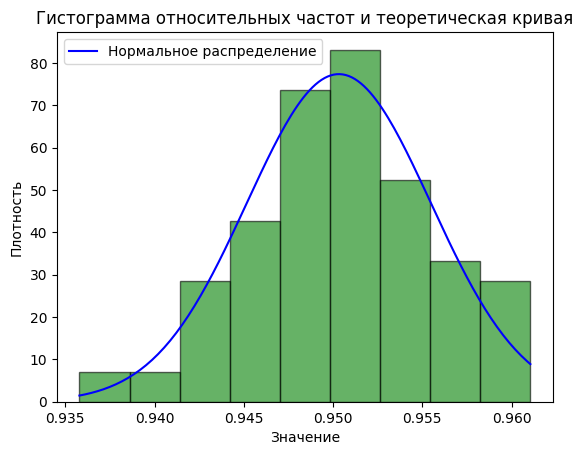

In [52]:
plt.hist(gamma_arr, bins=len(bins_g), density=True, alpha=0.6, color='g', edgecolor='black')
plt.title('Гистограмма относительных частот')
plt.xlabel('Значение')
plt.ylabel('Плотность')

x = np.linspace(np.min(gamma_arr), np.max(gamma_arr), 150)
pdf = sts.norm.pdf(x, np.mean(gamma_arr), np.std(gamma_arr))
plt.plot(x, pdf, 'b', label="Нормальное распределение")

plt.title('Гистограмма относительных частот и теоретическая кривая')
plt.xlabel('Значение')
plt.ylabel('Плотность')
plt.legend()

# Показать график
plt.show()


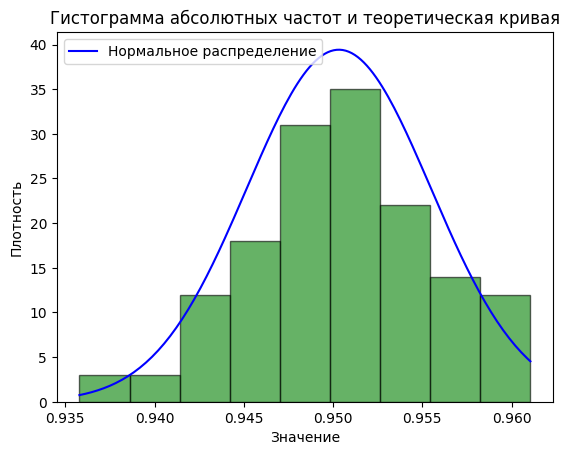

In [53]:
plt.hist(gamma_arr, bins=len(bins_g),alpha=0.6, color='g', edgecolor='black')
plt.title('Гистограмма относительных частот')
plt.xlabel('Значение')
plt.ylabel('Плотность')

x = np.linspace(np.min(gamma_arr), np.max(gamma_arr), 150)
pdf = sts.norm.pdf(x, np.mean(gamma_arr), np.std(gamma_arr))*150*h_gamma
plt.plot(x, pdf, 'b', label="Нормальное распределение")

plt.title('Гистограмма абсолютных частот и теоретическая кривая')
plt.xlabel('Значение')
plt.ylabel('Плотность')
plt.legend()

# Показать график
plt.show()

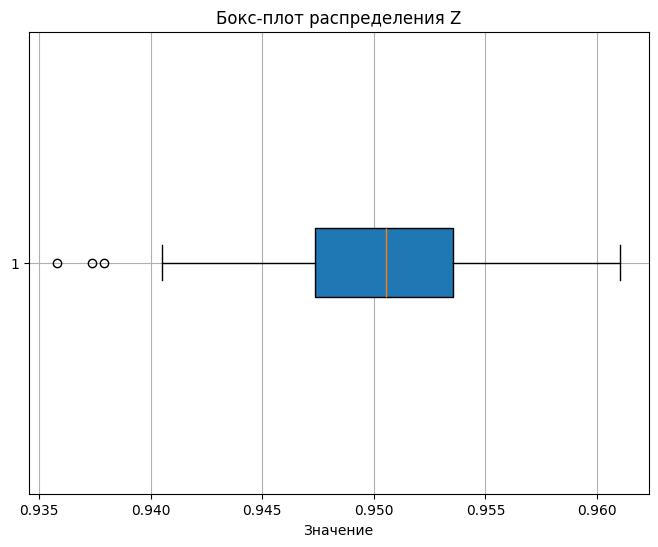

Фактическое количество выбросов: 3


In [54]:
plt.figure(figsize=(8, 6))
plt.boxplot(gamma_arr, vert=False, patch_artist=True)
plt.title('Бокс-плот распределения Z')
plt.xlabel('Значение')
plt.grid(True)
plt.show()

q1 = np.percentile(gamma_arr, 25)
q3 = np.percentile(gamma_arr, 75)
iqr = q3 - q1

# Вычисляем границы для усов
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = []
for i in gamma_arr:
    if i < lower_bound or i > upper_bound:
        outliers.append(i)
num_outliers = len(outliers)
print(f"Фактическое количество выбросов: {num_outliers}")

3. Смоделировать 1900 выборок из 15 значений случайной величины W, описанной в Вашем
варианте. По каждой из M выборок с надежностью 0,95 найти интервальную оценку
(доверительный интервал) для дисперсии случайной величины W (для построения
интервальной оценки дисперсии использовать ту же формулу, что и в пункте 1, Части II).
По результатам моделирования найти точечную оценку $\gamma$* надежности $\gamma$.
$$W = \sum_{i=1}^{4} U_i$$

где $U_1,U_2, ... . . ,U_4$ — случайная выборка из 4 значений случайной величины U, имеющей распределение Хи-квадрат с 4 степенями свободы

In [55]:

M = 1900  
n = 15    
W_arr = []

for i in range(M):
    W_i = []  
    for j in range(n):
        U = sts.chi2.rvs(df=4, size=4)
        W = sum(U)
        W_i.append(W)
    W_arr.append(W_i)

w_var=np.var(W_arr)
print(w_var)



32.136424201340475


In [56]:
M = 1900  
n = 15    
W_arr = [] 
count_gamma = 0
for i in range(M):
    W_i = []  
    for j in range(n):
        U = sts.chi2.rvs(df=4, size=4)
        W = sum(U)
        W_i.append(W)
    W_arr.append(W_i)

    sample_mean = np.mean(W_i)
    
    s_2 = 0
    for x in W_i:
        s_2 += math.pow(x - sample_mean, 2)
    s_2 /= 14 

    alpha = 0.05
    chi2_lower = sts.chi2.ppf(alpha / 2, df=14)
    chi2_upper = sts.chi2.ppf(1 - alpha / 2, df=14)

    # Вычисляем границы доверительного интервала для дисперсии
    lower_bound = 14 * s_2 / chi2_upper
    upper_bound = 14 * s_2 / chi2_lower
    
    if (lower_bound <=w_var) and (w_var <= upper_bound):
        count_gamma += 1

    # Точечная оценка надежности γ*
gamma = count_gamma / M
print(f"Точечная оценка надежности γ*: {gamma}")

    

Точечная оценка надежности γ*: 0.9221052631578948


4. Повторив пункт 3. 150 раз, получите массив из 150 значений оценки $\gamma$*. Найдите выборочные

числовые характеристики оценки $\gamma$*, постройте гистограмму относительных частот и бокс-
плот.

In [57]:
g_arr=list()
k=150
for g in range(k):
    W_arr = [] 
    count_gamma = 0
    for i in range(M):
        W_i = []  
        for j in range(n):
            U = sts.chi2.rvs(df=4, size=4)
            W = sum(U)
            W_i.append(W)
        W_arr.append(W_i)

        sample_mean = np.mean(W_i)
        
        s_2 = 0
        for x in W_i:
            s_2 += math.pow(x - sample_mean, 2)
        s_2 /= 14 

        alpha = 0.05
        chi2_lower = sts.chi2.ppf(alpha / 2, df=14)
        chi2_upper = sts.chi2.ppf(1 - alpha / 2, df=14)

        # Вычисляем границы доверительного интервала для дисперсии
        lower_bound = 14 * s_2 / chi2_upper
        upper_bound = 14 * s_2 / chi2_lower
        
        if (lower_bound <=w_var) and (w_var <= upper_bound):
            count_gamma += 1

        # Точечная оценка надежности γ*
    gamma = count_gamma / M
    g_arr.append(gamma)

In [59]:
g_mean=np.mean(g_arr)
g_var=np.var(g_arr)
g_median = np.median(g_arr)
g_std= np.std(g_arr) 
g_skewness = sts.skew(g_arr)        # Коэффициент ассиметрии
g_kurtosis = sts.kurtosis(g_arr)

print(f'Математическое ожидание: {g_mean:.5f}')
print(f'Медиана: {g_median:.5f}')
print(f'Дисперсия: {g_var:.5f}')
print(f'Стандартное отклонение: {g_std:.5f}')
print(f'Коэффициент ассиметрии: {g_skewness:.5f}')
print(f'Эксцесс: {g_kurtosis:.5f}')

Математическое ожидание: 0.92057
Медиана: 0.92105
Дисперсия: 0.00004
Стандартное отклонение: 0.00630
Коэффициент ассиметрии: -0.38648
Эксцесс: 0.77310


In [60]:
# Формула Скотта: ширина бина
h_g = 3.5 * g_std / (150 ** (1/3))

#полученные интервалы
bin_g = (np.arange(min(g_arr), max(g_arr) + h_g, h_g))/150
print(bin_g)

[0.00597544 0.00600311 0.00603078 0.00605845 0.00608612 0.00611379
 0.00614146 0.00616913 0.0061968  0.00622447 0.00625213]


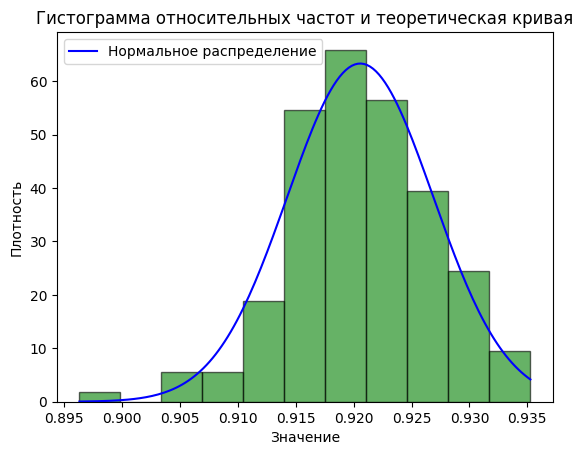

In [63]:
plt.hist(g_arr, bins=len(bin_g), density=True, alpha=0.6, color='g', edgecolor='black')
plt.title('Гистограмма относительных частот')
plt.xlabel('Значение')
plt.ylabel('Плотность')

x = np.linspace(np.min(g_arr), np.max(g_arr), 150)
pdf = sts.norm.pdf(x, np.mean(g_arr), np.std(g_arr))
plt.plot(x, pdf, 'b', label="Нормальное распределение")

plt.title('Гистограмма относительных частот и теоретическая кривая')
plt.xlabel('Значение')
plt.ylabel('Плотность')
plt.legend()

# Показать график
plt.show()

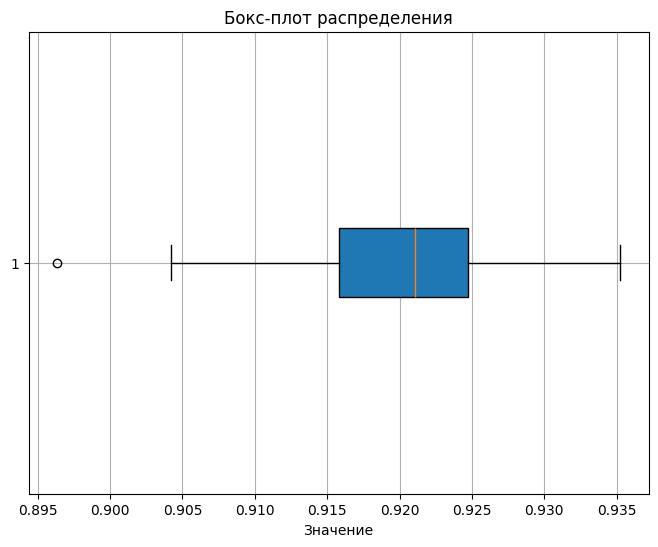

Фактическое количество выбросов: 1


In [64]:
plt.figure(figsize=(8, 6))
plt.boxplot(g_arr, vert=False, patch_artist=True)
plt.title('Бокс-плот распределения')
plt.xlabel('Значение')
plt.grid(True)
plt.show()

q1 = np.percentile(g_arr, 25)
q3 = np.percentile(g_arr, 75)
iqr = q3 - q1

# Вычисляем границы для усов
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = []
for i in g_arr:
    if i < lower_bound or i > upper_bound:
        outliers.append(i)
num_outliers = len(outliers)
print(f"Фактическое количество выбросов: {num_outliers}")